In [1]:
pip install -e ..

Obtaining file:///home/chris/Projects/ml_scratch
  Attempting uninstall: ml-scratch
    Found existing installation: ml-scratch 0.0.1
    Uninstalling ml-scratch-0.0.1:
      Successfully uninstalled ml-scratch-0.0.1
  Running setup.py develop for ml-scratch
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import ml_scratch as ml
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib as mpl

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 20
})

# Data

In [3]:
n = 200
m = 2
y = np.random.choice([0,1], n)
X0 = np.random.randn(n, m) - np.array([0.75, 0.75])
X1 = np.random.randn(n, m) - np.array([-0.75, -0.75])
X = X0.copy()
X[y == 1] = X1[y == 1]

/home/chris/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


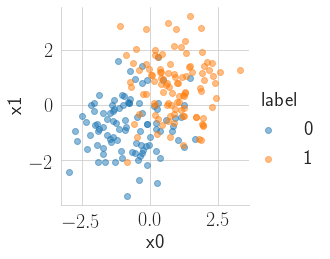

In [4]:
df = pd.DataFrame(X)
df.columns = ['x0', 'x1']
df['label']= y

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="label", size=4) \
   .map(plt.scatter, "x0", "x1", alpha = 0.5) \
   .add_legend()
plt.show()

# ml_scratch version of Gaussian Discriminant Analysis (GDA)

In [5]:
model = ml.GDA()
model.fit(X, y)
model.params

{'mu0': array([-0.76405803, -0.75226157]),
 'mu1': array([0.89161843, 0.66238048]),
 'sigma': array([[0.9129606 , 0.02975706],
        [0.02975706, 1.0712509 ]]),
 'phi': 0.515}

In [6]:
probs = model.predict(X)

/home/chris/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


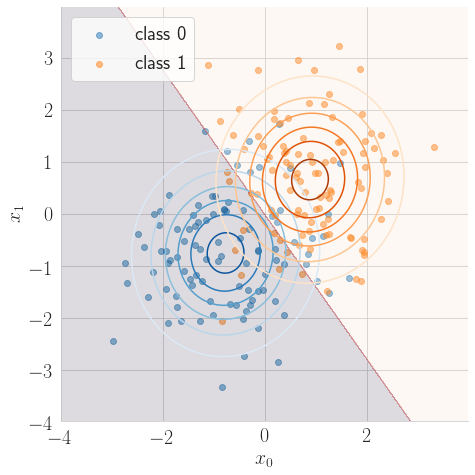

In [7]:
def plot_gaussian(ax, mu, sigma, cmap = cm.Oranges):
    delta = 0.01
    x = np.arange(-4.0, 4.0, delta)
    y = np.arange(-4.0, 4.0, delta)
    X_contour, Y_contour = np.meshgrid(x, y)

    XY_contour = np.stack([X_contour.flatten(), 
              Y_contour.flatten()], axis= 1)

    Z0 = ml.gaussian_pdf(XY_contour, 
                        mu, 
                        sigma)
    Z0 = Z0.reshape(X_contour.shape)
    
    CS = ax.contour(X_contour, Y_contour, Z0, cmap = cmap)
    return ax
    
def plot_label_heatmap(ax, model):
    delta = 0.01
    x = np.arange(-4.0, 4.0, delta)
    y = np.arange(-4.0, 4.0, delta)
    X_contour, Y_contour = np.meshgrid(x, y)

    XY_contour = np.stack([X_contour.flatten(), 
              Y_contour.flatten()], axis= 1)

    Z0 = model.predict(XY_contour)
    Z0 = 1*(Z0 > 0.5)
    Z0 = Z0.reshape(X_contour.shape)
    
    CS = ax.contourf(X_contour, Y_contour, Z0, alpha = 0.15)
    return ax
    
res = sns.FacetGrid(data=df, hue="label", size=7) \
   .map(plt.scatter, "x0", "x1", alpha = 0.5) \
   #.add_legend()

ax = res.ax

ax = plot_gaussian(ax, model.params['mu0'], model.params['sigma'], cm.Blues)
ax = plot_gaussian(ax, model.params['mu1'], model.params['sigma'], cm.Oranges)

ax = plot_label_heatmap(ax, model)

ax.set_xlabel(r'$x_0$', fontsize = 20)
ax.set_ylabel(r'$x_1$', fontsize = 20)


# # replace labels
new_labels = [r'class 0', r'class 1']
ax.legend(
    labels = new_labels
)
plt.show()

fig = res.fig
fig.savefig('../images/GDA.pdf', format='pdf', bbox_inches='tight')
fig.savefig("../images/GDA.svg", format="svg", bbox_inches='tight') 